# TD 2

# Exercice 8

In [3]:
import numpy as np
from scipy.integrate import quad

# Définir la suite
def compute_u(n_terms=10):
    u = [1]  # u0 = 1
    for n in range(n_terms - 1):
        # Définir l'intégrande : u[n] * x^n
        integrand = lambda x: u[n] * x**n
        # Calculer l'intégrale de 0 à 1
        integral, _ = quad(integrand, 0, 1)
        u.append(integral)
    return u

# Calculer les 10 premiers termes
u_values = compute_u(10)

# Afficher les résultats
for i, val in enumerate(u_values):
    print(f"u_{i} = {val}")


u_0 = 1
u_1 = 1.0
u_2 = 0.5
u_3 = 0.16666666666666669
u_4 = 0.04166666666666667
u_5 = 0.008333333333333335
u_6 = 0.0013888888888888894
u_7 = 0.0001984126984126985
u_8 = 2.4801587301587315e-05
u_9 = 2.7557319223985914e-06


# Exercice 9

In [4]:
def aitken(u):
    """Renvoie la suite accélérée par la méthode d'Aitken."""
    return [u[n] - (u[n+1] - u[n])**2 / (u[n+2] - 2*u[n+1] + u[n])
            for n in range(len(u) - 2)]


In [5]:
import numpy as np

# Générer les premiers termes de la suite harmonique
N = 20
u = [sum(1/k for k in range(1, n+1)) for n in range(1, N+1)]

# Appliquer Aitken
u_acc = aitken(u)

# Afficher les résultats
for i in range(len(u_acc)):
    print(f"n={i+1:2d} : u_n = {u[i]:.6f}, u'_n = {u_acc[i]:.6f}")


n= 1 : u_n = 1.000000, u'_n = 2.500000
n= 2 : u_n = 1.500000, u'_n = 2.833333
n= 3 : u_n = 1.833333, u'_n = 3.083333
n= 4 : u_n = 2.083333, u'_n = 3.283333
n= 5 : u_n = 2.283333, u'_n = 3.450000
n= 6 : u_n = 2.450000, u'_n = 3.592857
n= 7 : u_n = 2.592857, u'_n = 3.717857
n= 8 : u_n = 2.717857, u'_n = 3.828968
n= 9 : u_n = 2.828968, u'_n = 3.928968
n=10 : u_n = 2.928968, u'_n = 4.019877
n=11 : u_n = 3.019877, u'_n = 4.103211
n=12 : u_n = 3.103211, u'_n = 4.180134
n=13 : u_n = 3.180134, u'_n = 4.251562
n=14 : u_n = 3.251562, u'_n = 4.318229
n=15 : u_n = 3.318229, u'_n = 4.380729
n=16 : u_n = 3.380729, u'_n = 4.439553
n=17 : u_n = 3.439553, u'_n = 4.495108
n=18 : u_n = 3.495108, u'_n = 4.547740


# Exercice 10

In [6]:
def somme_double(n):
    total = 0
    for i in range(1, n+1):
        total += sum(1 / (i * j) for j in range(1, i+1))
    return total


In [7]:
import math

n = 1000
s = somme_double(n)
approx = (math.log(n))**2

print(f"S({n}) = {s:.5f}, approximation = (ln n)^2 = {approx:.5f}")


S(1000) = 28.83810, approximation = (ln n)^2 = 47.71708


# Exercice 11

In [1]:
from fractions import Fraction
import math

def convergents_sqrt2(n):
    conv = []
    a = [1] + [2]*(n-1)
    for i in range(1, n+1):
        frac = Fraction(a[i-1])
        for j in reversed(a[:i-1]):
            frac = j + 1/frac
        conv.append(frac)
    return conv


In [2]:
conv = convergents_sqrt2(10)
for i, frac in enumerate(conv):
    print(f"n={i+1}: {float(frac):.8f}, erreur = {abs(float(frac) - math.sqrt(2)):.2e}")


n=1: 1.00000000, erreur = 4.14e-01
n=2: 1.50000000, erreur = 8.58e-02
n=3: 1.40000000, erreur = 1.42e-02
n=4: 1.41666667, erreur = 2.45e-03
n=5: 1.41379310, erreur = 4.20e-04
n=6: 1.41428571, erreur = 7.22e-05
n=7: 1.41420118, erreur = 1.24e-05
n=8: 1.41421569, erreur = 2.12e-06
n=9: 1.41421320, erreur = 3.64e-07
n=10: 1.41421362, erreur = 6.25e-08


# Exercice 12

In [3]:
from math import gcd

def suite_coprime(n):
    u = [1]
    for _ in range(n - 1):
        k = u[-1] + 1
        while gcd(k, u[-1]) != 1:
            k += 1
        u.append(k)
    return u


In [4]:
print(suite_coprime(20))


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


# Exercice 13

In [5]:
def suite_non_lineaire(n):
    u = [1]
    for _ in range(n - 1):
        u.append(u[-1] + 1 / u[-1])
    return u


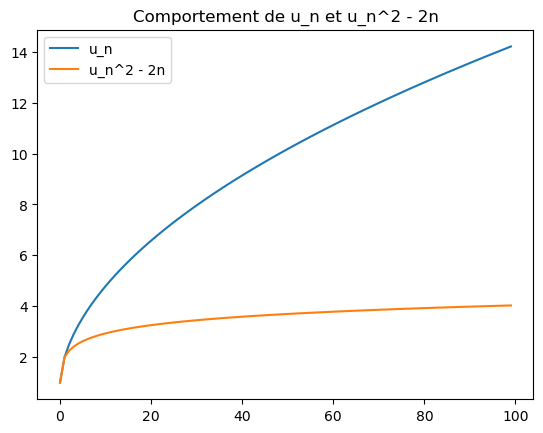

In [6]:
import matplotlib.pyplot as plt

u = suite_non_lineaire(100)
u_squared_minus_2n = [u[i]**2 - 2*i for i in range(len(u))]

plt.plot(u, label="u_n")
plt.plot(u_squared_minus_2n, label="u_n^2 - 2n")
plt.legend()
plt.title("Comportement de u_n et u_n^2 - 2n")
plt.show()


# Exercice 14

In [7]:
import random

def markov_chain(p, n):
    u = [0]
    for _ in range(n):
        X = 1 if random.random() < p else -1
        u.append(u[-1] + X)
    return u


In [8]:
def stats(p, n, m=1000):
    final_values = []
    for _ in range(m):
        u = markov_chain(p, n)
        final_values.append(u[-1])
    mean = sum(final_values) / m
    var = sum((x - mean)**2 for x in final_values) / m
    return mean, var


In [9]:
for p in [0.5, 0.6, 0.7]:
    mean, var = stats(p, 100)
    print(f"p = {p} → moyenne = {mean:.2f}, variance = {var:.2f}")


p = 0.5 → moyenne = -0.24, variance = 97.68
p = 0.6 → moyenne = 19.91, variance = 105.31
p = 0.7 → moyenne = 40.24, variance = 85.48
